<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Trading_Strat%C3%A9gie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
start = '2015-07-01'
end = '2017-07-01'
united = yf.download('UAL', start=start, end=end)
american = yf.download('AAL', start=start, end=end)

/tmp/ipython-input-980763355.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  united = yf.download('UAL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-980763355.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  american = yf.download('AAL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
american.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-01,40.650002,40.900002,37.799999,38.799999,36.913128,24907100
2015-07-02,39.020000,39.810001,38.400002,39.029999,37.131939,11080000
2015-07-06,39.090000,40.000000,39.080002,39.730000,37.797905,9157700
2015-07-07,39.930000,40.740002,39.259998,40.669998,38.692192,10375900
2015-07-08,40.299999,40.310001,39.139999,39.310001,37.398327,11193000


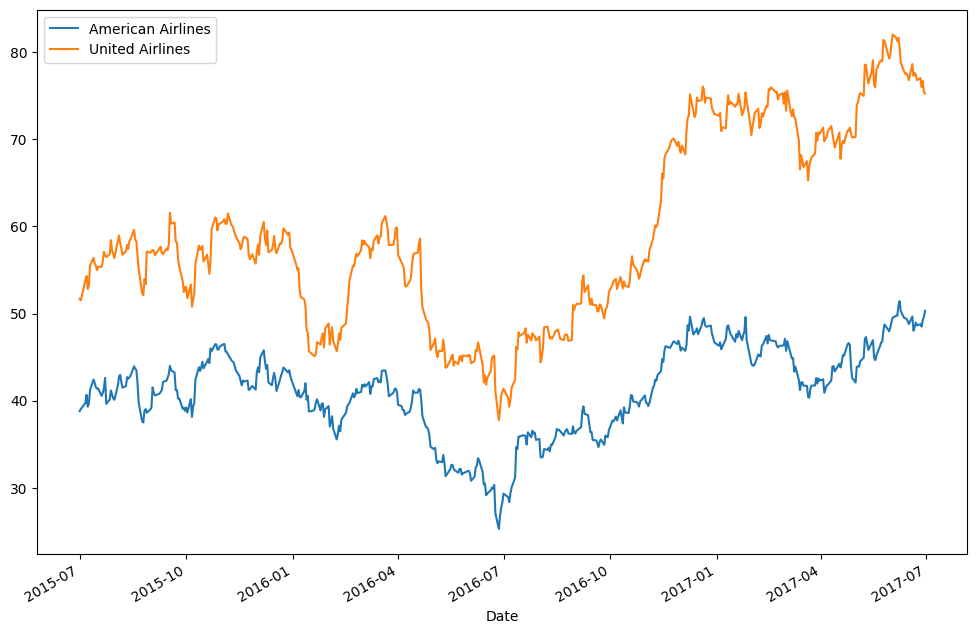

In [ ]:
american['Close'].plot(label='American Airlines',figsize=(12,8))
united['Close'].plot(label='United Airlines')
plt.legend()


In [ ]:
np.corrcoef(american['Close'],united['Close'])

array([[1.        , 0.90079951],
       [0.90079951, 1.        ]])

In [ ]:
spread = american['Close'] - united['Close']

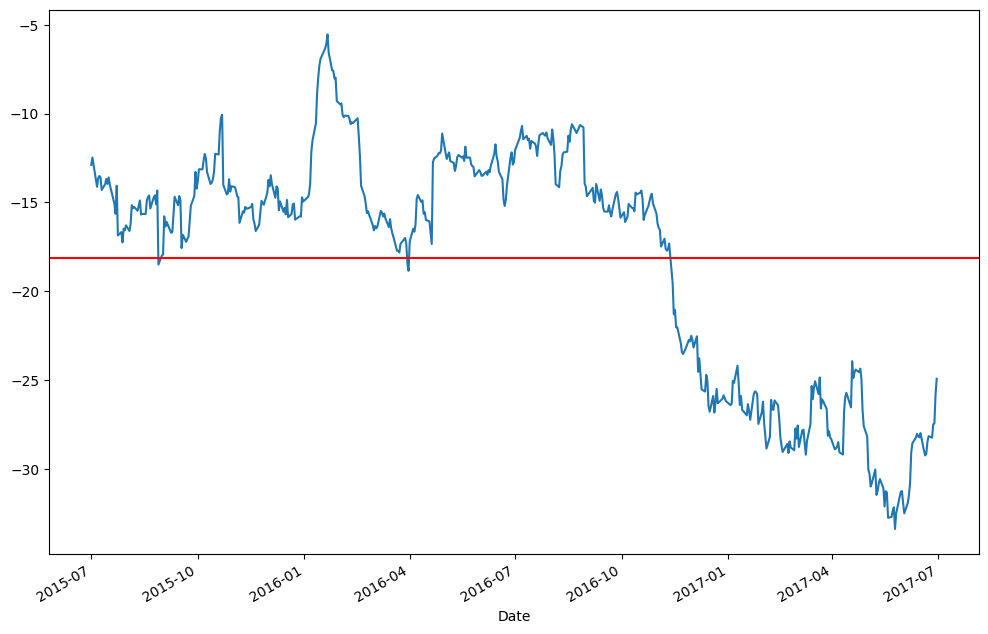

In [ ]:
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='red')

In [ ]:
def zscore(stocks):
    return (stocks - stocks.mean())/np.std(stocks)

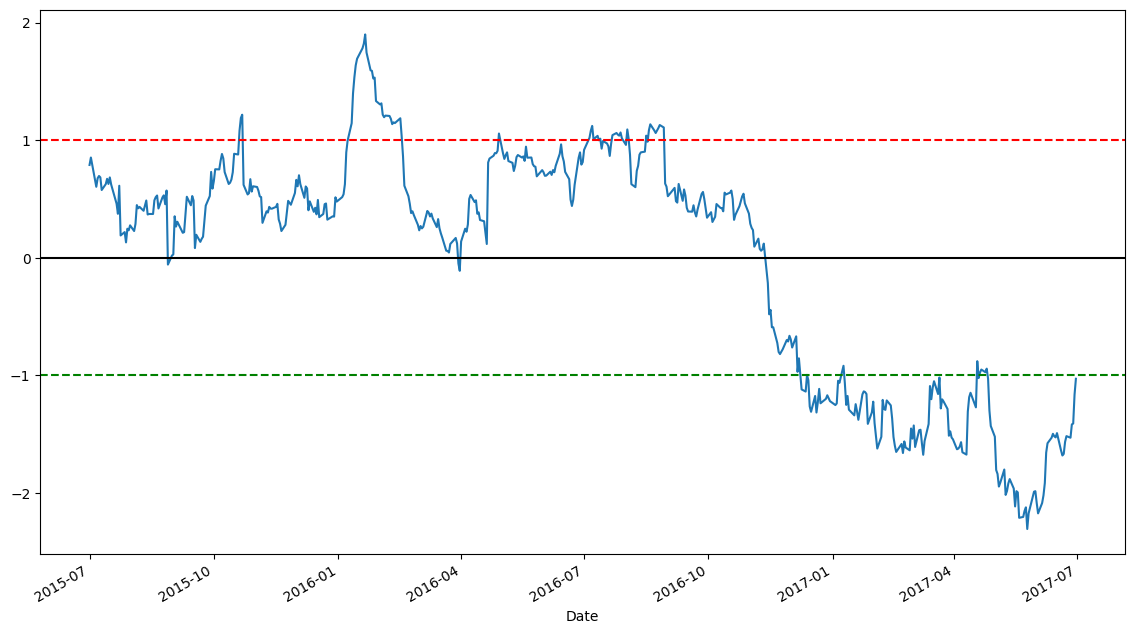

In [ ]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(),color='black')
plt.axhline(1.0,c='r',ls='--')
plt.axhline(-1.0,c='g',ls='--')

In [ ]:
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()

In [ ]:
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30

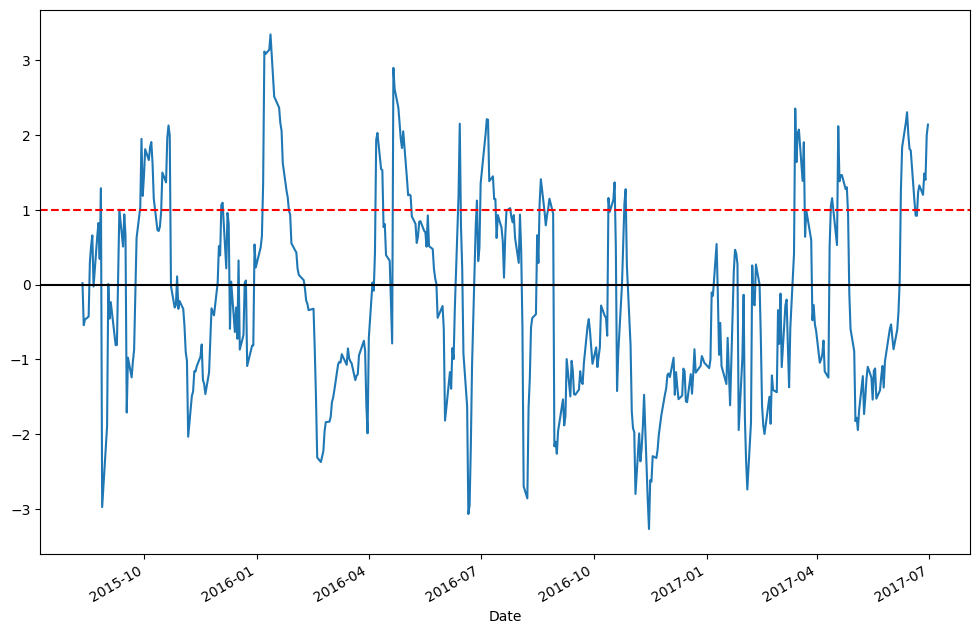

In [ ]:
zscore_30_1.plot(figsize=(12,8),label='z score mobile sur 30 jours')
plt.axhline(0,color='black')
plt.axhline(1.0,color='red',linestyle='--')